In [1]:
# The pandas data science library that gives the 'spreadsheet'-like capabilities to python
import pandas as pd
# The matplotlip library is used to visualize data
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator
import matplotlib.cm as cm
from matplotlib.dates import DateFormatter

# The pathlib library is used to manage access to disk. It helps us to keep things the same between Windows and Linux
from pathlib import Path
# The os library is used to list and access files and directories on the hard drive
import os, sys
# Numpy is the numerical library. It is used by many of the ones before, but we import it for in case
import numpy as np
# From Numpy we also import the nan 'missing-value' object that we use alot
from numpy import nan
# For fancy matching of strings, we use re
import re
# String libary for temporary file import
from io import StringIO

# Library for manipulating date and time
import datetime 

#Figure style library
import seaborn as sns
sns.set_theme(style="darkgrid")
#Register pandas formatters and converters with matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import re


import xarray as xr


import geopandas as gpd

import xml.etree.ElementTree as ET

import glob


from shapely.geometry.polygon import Polygon

import rioxarray

import cartopy.crs as ccrs
from cartopy.io import srtm
import cartopy

In [2]:
HomeDir= Path('/home/gerhardt/RadarData/Study/MSc')
DataDir = Path(HomeDir, 'Data')
FigDir = Path(HomeDir, 'Figures')
GisDir = Path(DataDir, 'GIS')
RadarDir = Path(HomeDir, 'Data/Radar')
FireDir = Path(HomeDir, 'Data/FIRE')
ResultDir = Path(HomeDir, 'Results')

In [3]:
filtered_plumes = gpd.read_file(os.path.join(DataDir, 'Radar', 'Plume', 'Daily','CombinedPlumesDaily_level0.geojson'))

In [14]:
filtered_plumes.Time.dt.date

0       2013-06-25
1       2013-06-25
2       2013-06-25
3       2013-06-25
4       2013-06-25
           ...    
3961    2013-06-19
3962    2013-06-19
3963    2013-06-19
3964    2013-06-19
3965    2013-06-19
Name: Time, Length: 3966, dtype: object

In [20]:
filtered_plumes

,Time,Track_ID,Day,Age (seconds),Cell Top (km),Max dBZ (dBZ),Area (km2),Unique_ID,geometry
0,2013-06-25 15:11:55,14.0,20130625,2522.0,3.625,34.8163,19.001150,20130625_14.0,"POLYGON ((1733037.990 1704815.077, 1733275.715..."
1,2013-06-25 15:05:56,14.0,20130625,2522.0,3.625,39.1877,21.140187,20130625_14.0,"POLYGON ((1730371.414 1704132.940, 1730579.734..."
2,2013-06-25 14:59:55,14.0,20130625,2522.0,3.625,43.0488,17.885552,20130625_14.0,"POLYGON ((1728071.940 1703450.848, 1728220.501..."
3,2013-06-25 14:59:55,12.0,20130625,3962.0,3.625,30.9004,20.399286,20130625_12.0,"POLYGON ((1741603.442 1703814.796, 1741831.575..."
4,2013-06-25 14:53:53,14.0,20130625,2522.0,3.625,45.4162,21.311887,20130625_14.0,"POLYGON ((1725845.288 1704273.693, 1726043.066..."
...,...,...,...,...,...,...,...,...,...
3961,2013-06-19 10:23:52,1.0,20130619,2249.0,4.375,44.6829,37.581860,20130619_1.0,"POLYGON ((1753998.411 1708731.660, 1754256.379..."
3962,2013-06-19 10:11:54,1.0,20130619,2249.0,4.375,42.7168,31.009578,20130619_1.0,"POLYGON ((1753628.897 1708006.076, 1753846.528..."
3963,2013-06-19 10:05:53,1.0,20130619,2249.0,4.375,42.1754,31.923705,20130619_1.0,"POLYGON ((1752766.901 1708032.634, 1753054.233..."
3964,2013-06-19 09:59:54,1.0,20130619,2249.0,4.375,48.7636,28.698074,20130619_1.0,"POLYGON ((1751878.143 1706541.294, 1752125.811..."


<Axes: >

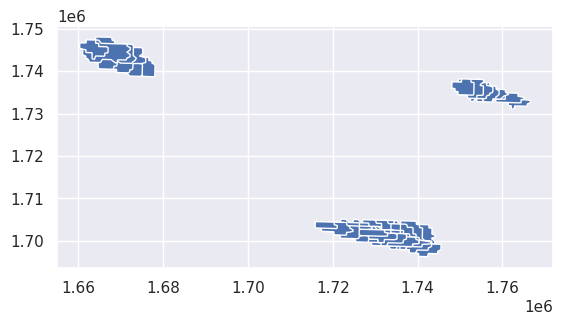

In [24]:
filtered_plumes.loc[filtered_plumes['Day'] == '20130625'].plot()

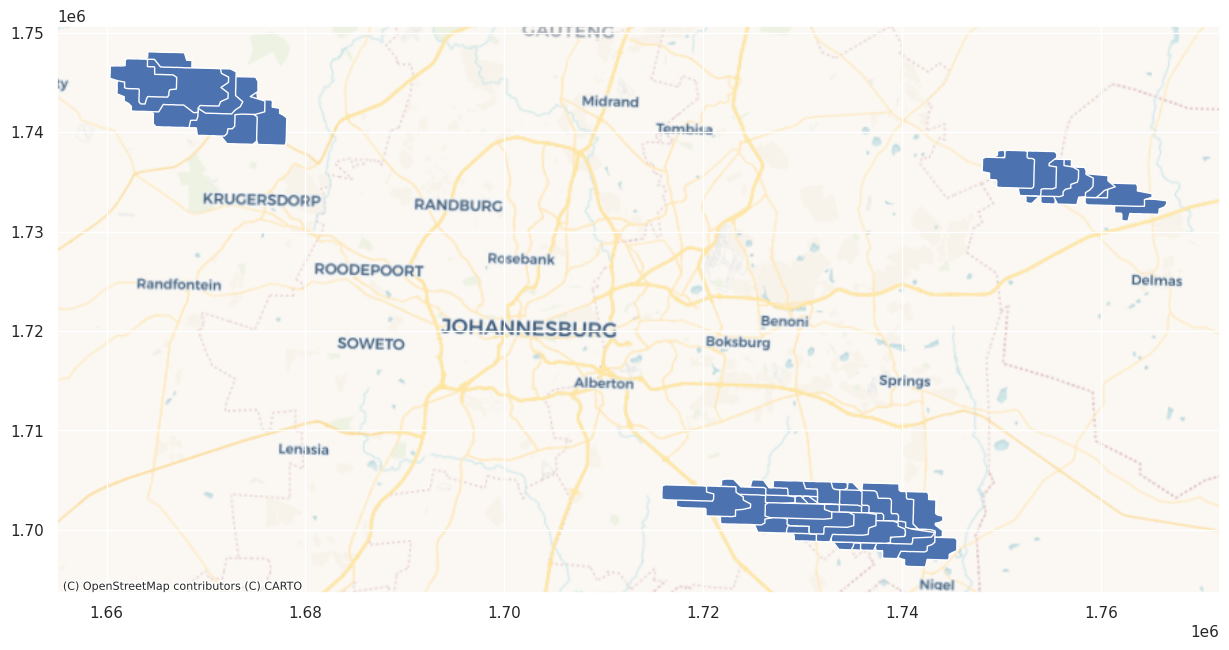

In [40]:
import contextily as cx

fig, ax = plt.subplots(figsize=(15, 15))


filtered_plumes.loc[filtered_plumes['Day'] == '20130625'].plot(ax=ax)

cx.add_basemap(ax=ax, crs=filtered_plumes.crs.to_string(), source=cx.providers.CartoDB.Voyager, zoom=10)

plt.savefig('PhD_CaseStudy01.png', dpi=400)

In [42]:
import os
import warnings

import cartopy.crs as ccrs
import matplotlib.pyplot as plt


import pyart
from pyart.testing import get_test_data

warnings.filterwarnings('ignore')


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



In [49]:
file = '/home/gerhardt/RadarData/data/mdv/cart/20130625/100551.mdv'
filex = pyart.io.prepare_for_read(file)
radar = pyart.io.read_mdv(filex)

NotImplementedError: Unsupported projection type: 8, is MDV file in antenna coordinates?

In [48]:
rad